## LDA 01

In [ ]:
pip install preprocessing

In [ ]:
from gensim import corpora
from preprocess import get_tokenizer

In [ ]:
# pip install </home/aiffel-dj23/preprocess-2.0.0>

In [ ]:
# python setup.py install

In [ ]:
# 모델피처 생성

corpus_frame = ''

documents, tokenized_corpus = [], []
tokenizer = get_tokenizer("mecab")

with open(courpus_frame, 'r', encoding='utf-8') as f:
    for document in f:
        tokens = list(set(tokenizer.morphs(document.strip())))
        documents.append(document)
        tokenized_corpus.append(token)
dictionary = corpora.Dictionary(tokenized_corpus)
corpus = [dictionary.doc2bow(text) for text in tokenized_corpus]


In [ ]:
from gensim.models import ldamulticore

LDA =ldamulticore.LdaMulticore(corpus, id2word=dictionary), num_topic =30, workers=4)

all_topics = LDA.get_document_topics(corpus, minimum_probability=0.5, 
                                     per_word_topics= False)

for doc_idx, topic in enumerate(all_topics[:5]):
    print(doc_idx, topic)


In [ ]:
from models.sent_eval import LDAEvaluator
model = LDAEvaluator("data/sentence-embeddings/lda/lda")

In [ ]:
model.show_topic_docs(topic_id=0)

In [ ]:
model.show_topic_words(topic_id=0)

In [ ]:
model.show_new_document_topic(["너무 사랑스러운 영화", "인생을 말하는 영화"])

## 토큰화

In [ ]:
import os
from os.path import join
import pandas as pd

data_dir = os.getenv('HOME')+'/Desktop/project/data'

df = join(data_dir, 'google_reviews_nolabel.csv')
df01 = join(data_dir, 'art_culture_complex_spacing.csv')

df = pd.read_csv(df)
df01 = pd.read_csv(df01)

df.head()

In [ ]:
df.tail

In [ ]:
df01.head()

In [ ]:
text = df["comment"]
text

In [ ]:
text01 = df01["comment"]
text01

In [ ]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import *
from konlpy.utils import pprint
import numpy as np
import lda
from sklearn.pipeline import Pipeline
import pandas as pd
import statsmodels.api as sm
from collections import Counter

In [ ]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
mecab = Mecab()
okt = Okt()

In [ ]:
# kkma

morphs = [] 

for sentence in small30: 
    morphs.append(kkma.pos(sentence)) 
print(morphs)

In [ ]:
# mecab

morphs = [] 

for sentence in text01: 
    morphs.append(mecab.nouns(sentence))  # 명사만 추출
print(morphs)

In [ ]:
# okt

morphs = [] 

for sentence in s30: 
    morphs.append(okt.nouns(sentence))   # 품사 부착
print(morphs)

## LDA 02

참고: https://joyhong.tistory.com/138

In [1]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
import csv
import pandas as pd
import os
from os.path import join
import pandas as pd

In [2]:
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pickle 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt

In [ ]:
pip install pyLDAvis==3.2.2

In [3]:
# 시각화를 위해 설치
import pyLDAvis.gensim

In [ ]:
# 명사만 추출한 csv 데이터 준비

/home/aiffel-dj23/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 15925/15925 [00:00<00:00, 180658.41it/s]
2021-06-05 22:38:45,771 : INFO : using symmetric alpha at 0.5
2021-06-05 22:38:45,771 : INFO : using symmetric eta at 0.5
2021-06-05 22:38:45,772 : INFO : using serial LDA version on this node
2021-06-05 22:38:45,774 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 15925 documents, updating model once every 2000 documents, evaluating perplexity every 15925 documents, iterating 50x with a convergence threshold of 0.001000
2021-06-05 22:38:45,774 : WARNING : too few updates, training might not converge; co

Number of unique tokens: 5998
Number of documents: 15925


2021-06-05 22:38:46,847 : INFO : merging changes from 2000 documents into a model of 15925 documents
2021-06-05 22:38:46,850 : INFO : topic #0 (0.500): 0.004*"의식" + 0.004*"강제" + 0.003*"군사" + 0.003*"학교" + 0.003*"광주" + 0.003*"강원도" + 0.003*"부장" + 0.003*"부대" + 0.003*"투쟁" + 0.003*"시장"
2021-06-05 22:38:46,850 : INFO : topic #1 (0.500): 0.004*"안동" + 0.003*"광복군" + 0.003*"전투" + 0.003*"읍내" + 0.003*"부장" + 0.003*"연락" + 0.003*"격문" + 0.003*"시위군" + 0.003*"주동" + 0.003*"시장"
2021-06-05 22:38:46,851 : INFO : topic diff=1.450745, rho=1.000000
2021-06-05 22:38:46,851 : INFO : PROGRESS: pass 0, at document #4000/15925
2021-06-05 22:38:47,614 : INFO : merging changes from 2000 documents into a model of 15925 documents
2021-06-05 22:38:47,615 : INFO : topic #0 (0.500): 0.004*"강원도" + 0.004*"부대" + 0.003*"강제" + 0.003*"집행유예" + 0.003*"의식" + 0.003*"군사" + 0.003*"광주" + 0.003*"시장" + 0.003*"부장" + 0.003*"한인"
2021-06-05 22:38:47,616 : INFO : topic #1 (0.500): 0.006*"광복군" + 0.004*"부장" + 0.004*"지대" + 0.004*"읍내" + 0.004*"처단

2021-06-05 22:38:52,038 : INFO : accumulator serialized
2021-06-05 22:38:52,040 : INFO : accumulator serialized
2021-06-05 22:38:52,041 : INFO : accumulator serialized
2021-06-05 22:38:52,048 : INFO : accumulator serialized
2021-06-05 22:38:52,049 : INFO : accumulator serialized
2021-06-05 22:38:52,049 : INFO : accumulator serialized
2021-06-05 22:38:52,038 : INFO : serializing accumulator to return to master...
2021-06-05 22:38:52,031 : INFO : serializing accumulator to return to master...
2021-06-05 22:38:52,091 : INFO : accumulator serialized
2021-06-05 22:38:52,091 : INFO : accumulator serialized
2021-06-05 22:38:52,108 : INFO : 11 accumulators retrieved from output queue
2021-06-05 22:38:52,120 : INFO : accumulated word occurrence stats for 128634 virtual documents
2021-06-05 22:38:52,209 : INFO : using symmetric alpha at 0.125
2021-06-05 22:38:52,210 : INFO : using symmetric eta at 0.125
2021-06-05 22:38:52,211 : INFO : using serial LDA version on this node
2021-06-05 22:38:52,21

2021-06-05 22:38:55,553 : INFO : topic diff=0.374918, rho=0.408248
2021-06-05 22:38:55,554 : INFO : PROGRESS: pass 0, at document #14000/15925
2021-06-05 22:38:55,985 : INFO : merging changes from 2000 documents into a model of 15925 documents
2021-06-05 22:38:55,988 : INFO : topic #2 (0.125): 0.010*"면사무소" + 0.006*"출동" + 0.006*"이용" + 0.005*"홍성군" + 0.005*"안동" + 0.005*"청양군" + 0.005*"주동" + 0.005*"면민" + 0.005*"대대" + 0.005*"서로군정서"
2021-06-05 22:38:55,989 : INFO : topic #3 (0.125): 0.013*"광복군" + 0.009*"입대" + 0.008*"상해" + 0.008*"지대" + 0.007*"비밀결사" + 0.007*"광복" + 0.007*"의식" + 0.006*"치안유지법" + 0.006*"졸업" + 0.005*"대한민국임시정부"
2021-06-05 22:38:55,990 : INFO : topic #6 (0.125): 0.023*"국민회" + 0.016*"대한" + 0.013*"지방회" + 0.011*"회장" + 0.010*"재무" + 0.009*"하와이" + 0.008*"총무" + 0.008*"선임" + 0.008*"차례" + 0.008*"총회"
2021-06-05 22:38:55,990 : INFO : topic #1 (0.125): 0.012*"독립군" + 0.010*"러시아" + 0.007*"설립" + 0.007*"고문" + 0.006*"길림성" + 0.006*"한인" + 0.006*"노령" + 0.005*"망명" + 0.005*"교육" + 0.004*"의식"
2021-06-05 22:3

2021-06-05 22:38:59,513 : INFO : topic #13 (0.071): 0.010*"유림" + 0.009*"회장" + 0.009*"광복군" + 0.007*"지방회" + 0.007*"상해" + 0.006*"김창숙" + 0.006*"작성" + 0.006*"국민회" + 0.005*"파견" + 0.005*"복역"
2021-06-05 22:38:59,513 : INFO : topic diff=0.871823, rho=0.707107
2021-06-05 22:38:59,517 : INFO : PROGRESS: pass 0, at document #6000/15925
2021-06-05 22:39:00,066 : INFO : merging changes from 2000 documents into a model of 15925 documents
2021-06-05 22:39:00,070 : INFO : topic #4 (0.071): 0.010*"지회" + 0.009*"한인" + 0.009*"부장" + 0.008*"독립군" + 0.008*"설치" + 0.008*"처단" + 0.007*"설립" + 0.007*"함북" + 0.006*"재무" + 0.006*"개최"
2021-06-05 22:39:00,071 : INFO : topic #8 (0.071): 0.006*"광주" + 0.006*"부장" + 0.005*"장백" + 0.005*"미국" + 0.005*"망명" + 0.004*"교육" + 0.004*"광정단" + 0.004*"졸업" + 0.003*"인산" + 0.003*"통의부"
2021-06-05 22:39:00,072 : INFO : topic #1 (0.071): 0.006*"신간회" + 0.006*"소대장" + 0.005*"다수" + 0.005*"격문" + 0.005*"안동" + 0.005*"집행" + 0.005*"군사" + 0.005*"심성지" + 0.005*"중대장" + 0.004*"인쇄"
2021-06-05 22:39:00,072 : INF

2021-06-05 22:39:03,015 : INFO : 9 batches submitted to accumulate stats from 576 documents (-12861 virtual)
2021-06-05 22:39:03,027 : INFO : 10 batches submitted to accumulate stats from 640 documents (-12797 virtual)
2021-06-05 22:39:03,173 : INFO : 60 batches submitted to accumulate stats from 3840 documents (-230577 virtual)
2021-06-05 22:39:03,192 : INFO : 68 batches submitted to accumulate stats from 4352 documents (-242089 virtual)
2021-06-05 22:39:03,409 : INFO : 113 batches submitted to accumulate stats from 7232 documents (-375207 virtual)
2021-06-05 22:39:03,444 : INFO : 119 batches submitted to accumulate stats from 7616 documents (-386678 virtual)
2021-06-05 22:39:03,450 : INFO : 120 batches submitted to accumulate stats from 7680 documents (-386164 virtual)
2021-06-05 22:39:03,796 : INFO : 196 batches submitted to accumulate stats from 12544 documents (-644043 virtual)
2021-06-05 22:39:04,018 : INFO : serializing accumulator to return to master...
2021-06-05 22:39:04,032 

2021-06-05 22:39:07,534 : INFO : topic #10 (0.050): 0.010*"모집활동" + 0.009*"제공" + 0.009*"대한민국" + 0.009*"부호" + 0.008*"대한민국임시정부" + 0.008*"비밀결사" + 0.008*"함남" + 0.008*"모금" + 0.007*"회원" + 0.006*"제령"
2021-06-05 22:39:07,535 : INFO : topic #0 (0.050): 0.012*"강제" + 0.011*"강원도" + 0.007*"군대" + 0.006*"전국" + 0.005*"체결" + 0.005*"기도" + 0.005*"러시아" + 0.005*"봉기" + 0.005*"함남" + 0.005*"황해도"
2021-06-05 22:39:07,536 : INFO : topic #18 (0.050): 0.015*"대구" + 0.012*"시위군" + 0.009*"이용" + 0.009*"교회" + 0.008*"기독교" + 0.007*"현장" + 0.007*"주동" + 0.007*"행진" + 0.006*"선두" + 0.006*"안동"
2021-06-05 22:39:07,536 : INFO : topic #16 (0.050): 0.018*"읍내" + 0.016*"시위군" + 0.014*"천도교" + 0.014*"시장" + 0.014*"행진" + 0.012*"면사무소" + 0.012*"법원" + 0.012*"고등" + 0.011*"시위행진" + 0.011*"이날"
2021-06-05 22:39:07,537 : INFO : topic diff=0.614569, rho=0.447214
2021-06-05 22:39:07,538 : INFO : PROGRESS: pass 0, at document #12000/15925
2021-06-05 22:39:07,923 : INFO : merging changes from 2000 documents into a model of 15925 documents
2021-06-05 22:

2021-06-05 22:39:11,949 : INFO : PROGRESS: pass 0, at document #2000/15925
2021-06-05 22:39:12,732 : INFO : merging changes from 2000 documents into a model of 15925 documents
2021-06-05 22:39:12,740 : INFO : topic #13 (0.038): 0.006*"광주" + 0.005*"학교" + 0.005*"반대" + 0.005*"본부" + 0.004*"집행유예" + 0.004*"강원도" + 0.004*"연락" + 0.004*"청년" + 0.004*"유시연" + 0.003*"계속"
2021-06-05 22:39:12,741 : INFO : topic #11 (0.038): 0.007*"양성" + 0.006*"읍내" + 0.006*"시위군" + 0.006*"부장" + 0.005*"원곡면" + 0.005*"방화" + 0.005*"순사" + 0.005*"처단" + 0.004*"독립군" + 0.004*"정의부"
2021-06-05 22:39:12,742 : INFO : topic #5 (0.038): 0.008*"재무" + 0.007*"함남" + 0.007*"안동" + 0.005*"부장" + 0.005*"서기" + 0.004*"부대" + 0.004*"결의" + 0.004*"대원" + 0.004*"강원도" + 0.004*"예안"
2021-06-05 22:39:12,743 : INFO : topic #6 (0.038): 0.007*"행진" + 0.005*"일본인" + 0.005*"계속" + 0.005*"입대" + 0.004*"시장" + 0.004*"순사" + 0.004*"결사" + 0.004*"격문" + 0.004*"군사" + 0.004*"단원"
2021-06-05 22:39:12,744 : INFO : topic #7 (0.038): 0.010*"부근" + 0.007*"시장" + 0.006*"대한독립단" + 0.0

2021-06-05 22:39:16,285 : INFO : PROGRESS: pass 0, at document #15925/15925
2021-06-05 22:39:16,700 : INFO : merging changes from 1925 documents into a model of 15925 documents
2021-06-05 22:39:16,709 : INFO : topic #25 (0.038): 0.017*"순창" + 0.012*"남원" + 0.011*"면암" + 0.010*"태인" + 0.010*"전주" + 0.009*"출신" + 0.009*"정읍" + 0.009*"지부" + 0.008*"광주지방재판소" + 0.008*"최익현"
2021-06-05 22:39:16,710 : INFO : topic #18 (0.038): 0.025*"홍성군" + 0.023*"청주" + 0.018*"평양" + 0.016*"애국부인회" + 0.016*"홍성" + 0.015*"부산" + 0.012*"동래" + 0.012*"교사" + 0.011*"가산리" + 0.011*"보통학교"
2021-06-05 22:39:16,711 : INFO : topic #19 (0.038): 0.017*"부하" + 0.017*"천도교" + 0.016*"나주" + 0.014*"장성" + 0.012*"전사" + 0.012*"전투" + 0.011*"기삼연" + 0.011*"민종식" + 0.010*"만행" + 0.010*"헌병대"
2021-06-05 22:39:16,711 : INFO : topic #0 (0.038): 0.024*"읍내" + 0.021*"천도교" + 0.015*"시장" + 0.012*"행진" + 0.012*"기독교" + 0.011*"시위대" + 0.011*"법원" + 0.011*"천도교인" + 0.010*"고등" + 0.010*"황해도"
2021-06-05 22:39:16,712 : INFO : topic #3 (0.038): 0.030*"대구" + 0.020*"광주" + 0.02

2021-06-05 22:39:21,926 : INFO : topic #13 (0.031): 0.011*"단원" + 0.011*"함남" + 0.009*"동단" + 0.008*"길림성" + 0.007*"훈춘" + 0.007*"토지" + 0.007*"광정단" + 0.006*"무기" + 0.006*"단장" + 0.006*"처단"
2021-06-05 22:39:21,927 : INFO : topic diff=0.990221, rho=0.577350
2021-06-05 22:39:21,927 : INFO : PROGRESS: pass 0, at document #8000/15925
2021-06-05 22:39:22,442 : INFO : merging changes from 2000 documents into a model of 15925 documents
2021-06-05 22:39:22,452 : INFO : topic #19 (0.031): 0.020*"상해" + 0.016*"의원" + 0.016*"임정" + 0.013*"의정원" + 0.012*"대구" + 0.011*"뒷산" + 0.009*"주동" + 0.009*"망명" + 0.008*"경주" + 0.007*"한국독립당"
2021-06-05 22:39:22,453 : INFO : topic #24 (0.031): 0.017*"삼림조합" + 0.014*"총회" + 0.010*"북미" + 0.010*"의식" + 0.010*"단천군청" + 0.009*"문제" + 0.008*"무정부주의" + 0.008*"함북" + 0.008*"석방" + 0.008*"사회"
2021-06-05 22:39:22,454 : INFO : topic #11 (0.031): 0.012*"미국" + 0.010*"중앙" + 0.010*"집행" + 0.008*"조선공산당" + 0.008*"정주" + 0.007*"개최" + 0.006*"선전" + 0.005*"지회" + 0.005*"창립" + 0.005*"선출"
2021-06-05 22:39:22,4

2021-06-05 22:39:27,218 : INFO : serializing accumulator to return to master...
2021-06-05 22:39:27,275 : INFO : accumulator serialized
2021-06-05 22:39:27,291 : INFO : accumulator serialized
2021-06-05 22:39:27,306 : INFO : serializing accumulator to return to master...
2021-06-05 22:39:27,290 : INFO : serializing accumulator to return to master...
2021-06-05 22:39:27,331 : INFO : serializing accumulator to return to master...
2021-06-05 22:39:27,319 : INFO : accumulator serialized
2021-06-05 22:39:27,324 : INFO : serializing accumulator to return to master...
2021-06-05 22:39:27,220 : INFO : accumulator serialized
2021-06-05 22:39:27,342 : INFO : accumulator serialized
2021-06-05 22:39:27,318 : INFO : accumulator serialized
2021-06-05 22:39:27,367 : INFO : accumulator serialized
2021-06-05 22:39:27,539 : INFO : 11 accumulators retrieved from output queue
2021-06-05 22:39:27,743 : INFO : accumulated word occurrence stats for 135067 virtual documents
2021-06-05 22:39:29,038 : INFO : us

2021-06-05 22:39:33,152 : INFO : topic #29 (0.026): 0.026*"소대장" + 0.014*"소장" + 0.012*"평안북도" + 0.012*"시흥" + 0.011*"아산군" + 0.010*"중대" + 0.010*"토지" + 0.010*"부장" + 0.010*"순사" + 0.009*"교도"
2021-06-05 22:39:33,153 : INFO : topic diff=0.738170, rho=0.408248
2021-06-05 22:39:33,154 : INFO : PROGRESS: pass 0, at document #14000/15925
2021-06-05 22:39:33,777 : INFO : merging changes from 2000 documents into a model of 15925 documents
2021-06-05 22:39:33,790 : INFO : topic #32 (0.026): 0.039*"이강년" + 0.023*"제천" + 0.021*"유인석" + 0.020*"전투" + 0.015*"전사" + 0.014*"대장" + 0.012*"의병진" + 0.012*"충북" + 0.012*"강원도" + 0.010*"문경"
2021-06-05 22:39:33,791 : INFO : topic #28 (0.026): 0.019*"홍성군" + 0.017*"서로군정서" + 0.016*"발포" + 0.015*"전사" + 0.010*"운구" + 0.010*"이날" + 0.010*"홍성" + 0.009*"공포" + 0.009*"청양군" + 0.009*"차별"
2021-06-05 22:39:33,792 : INFO : topic #16 (0.026): 0.021*"충북" + 0.018*"강원도" + 0.017*"의병활동" + 0.016*"출신" + 0.014*"수비대" + 0.013*"임실" + 0.010*"울진" + 0.009*"휘하" + 0.009*"공격" + 0.009*"대장"
2021-06-05 22:39:33

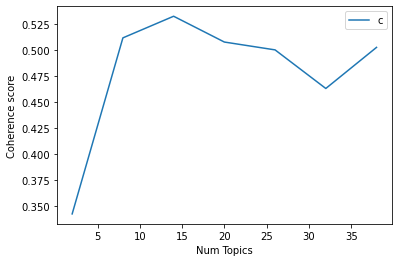

In [4]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = [] 
    model_list = []
    # ditionary는 Gensim dictionary, corpus는 Gensim corpus
    # text는 list of input texts, limit 는 max of topics
    
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 40;
    start = 2;
    step = 6;
    
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

    
if __name__ == '__main__':
    # 명사만으로 구성된 파일 open 
    processed_data = [sent.strip().split(",") for sent in tqdm(open('./tokenized_data.csv', 'r', encoding='utf-8').readlines())]

    # 정수 인코딩과 빈도수 생성
    dictionary = corpora.Dictionary(processed_data)

    # 출현빈도가 적거나 자주 등장하는 단어는 제거
    dictionary.filter_extremes(no_below=10, no_above=0.05)
    corpus = [dictionary.doc2bow(text) for text in processed_data]
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))

    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

     # 최적의 토픽 수 찾기
    find_optimal_number_of_topics(dictionary, corpus, processed_data)
    exit()

In [ ]:
if __name__ == '__main__':
    processed_data = [sent.strip().split(",") for sent in tqdm(open('./tokenized_data.csv', 'r', encoding='utf-8').readlines())]
    # 정수 인코딩과 빈도수 생성
    dictionary = corpora.Dictionary(processed_data)

    # 출현빈도가 적거나 자주 등장하는 단어 제거
    dictionary.filter_extremes(no_below=10, no_above=0.05)
    corpus = [dictionary.doc2bow(text) for text in processed_data]
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))
    
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) # 최적의 토픽 수 찾기 => 14개로 나옴

    # 최적의 토픽 수 찾기 = 14개 나옴
    
    perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
    coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')

    lda_model = LdaModel(corpus, id2word=dictionary, num_topics=14, passes=30, callbacks=[coherence_logger, perplexity_logger])

    topics = lda_model.print_topics(num_words=5)

    for topic in topics:
        print(topic)
    
    # Compute Coherence Score using c_v
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score (c_v): ', coherence_lda)

    # Compute Coherence Score using UMass
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence="u_mass")
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score (u_mass): ', coherence_lda)
   
    # 저장  
    pickle.dump(corpus, open('./data/lda/lda_corpus.pkl', 'wb'))
    dictionary.save('./data/lda/lda_dictionary.gensim')
    lda_model.save('./data/lda/lda_model.gensim')

    # pyLDAvis html 저장
    lda_visualization = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
    pyLDAvis.save_html(lda_visualization, './data/lda/독립유공자공적조서_lda.html')


In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.display(lda_visualization)

### 결과
u_mass는 0에 가까울수록 완벽한 일관성을 가진다는 의미이고 c_v는 0과 1사이로 0.55 정도면 준수하다고 하는 것 같다.